In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



In [2]:
df=pd.read_csv(r"C:\Users\Priyanka\Downloads\Copper_Set.xlsx - Result 1.csv")

In [3]:
df['item_date']=pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')


<Axes: >

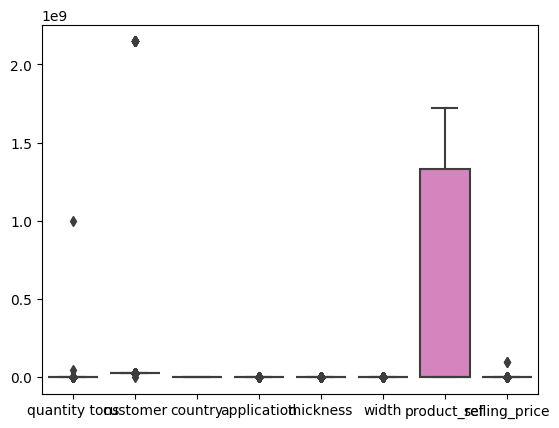

In [4]:
sns.boxplot(df)                                         #outliers are not present

In [5]:
df.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [6]:
df['material_ref'].fillna('Not Specified', inplace=True)
# deleting the remaining null values as they are less than 1%  of data which can be neglected 
df = df.dropna()
df.shape

(181631, 14)

In [7]:
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

<Axes: xlabel='quantity tons', ylabel='Density'>

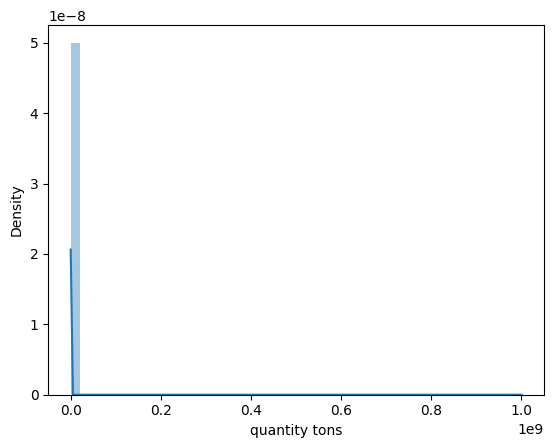

In [8]:
sns.distplot(df["quantity tons"])

<Axes: xlabel='country', ylabel='Density'>

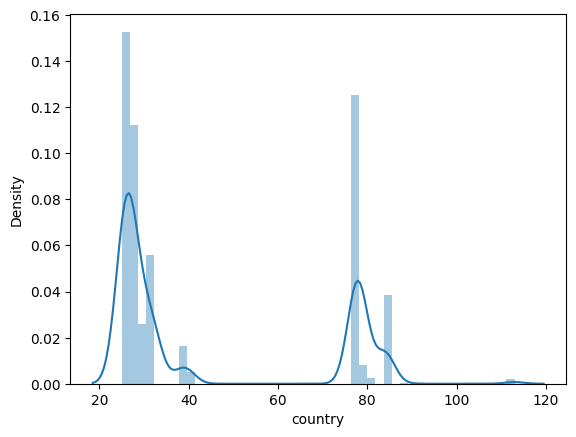

In [9]:
sns.distplot(df["country"])

<Axes: xlabel='application', ylabel='Density'>

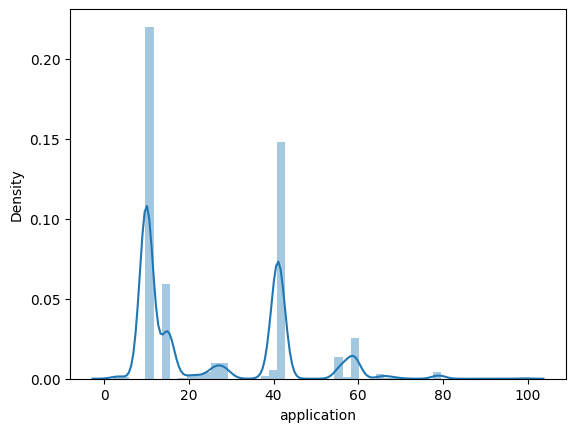

In [10]:
sns.distplot(df["application"])

<Axes: xlabel='width', ylabel='Density'>

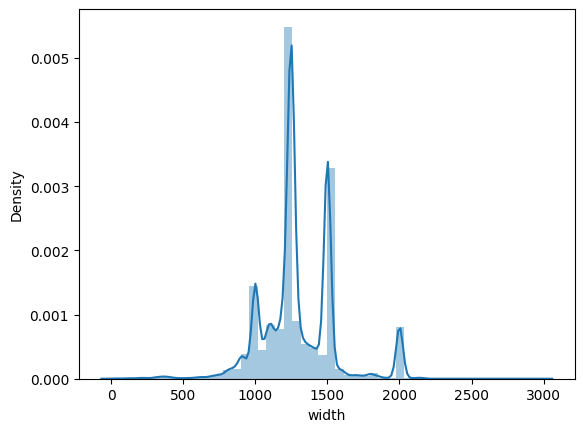

In [11]:
sns.distplot(df["width"])

<Axes: xlabel='thickness', ylabel='Density'>

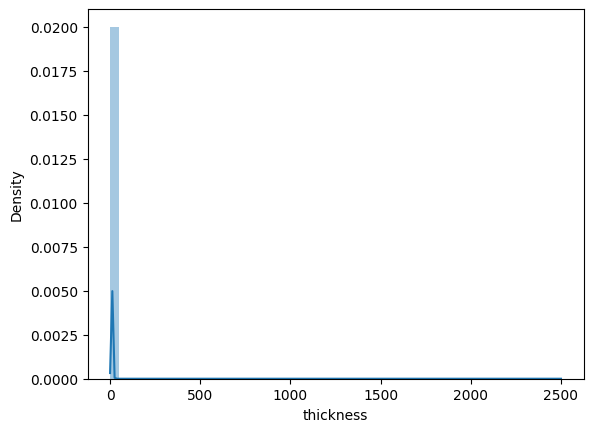

In [12]:
sns.distplot(df["thickness"])

<Axes: xlabel='selling_price', ylabel='Density'>

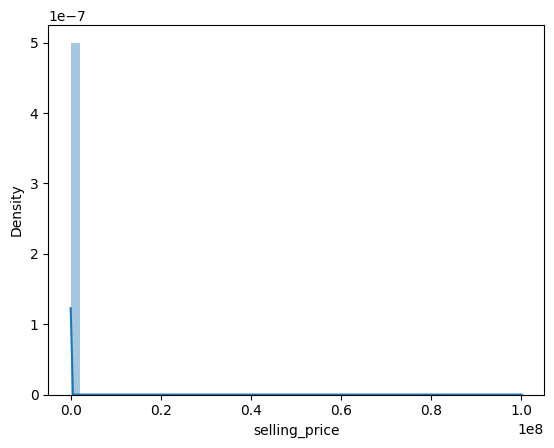

In [13]:
sns.distplot(df["selling_price"])

In [14]:
dfr=df.copy()
dfc=df.copy()
df.shape
dfr.shape


(181631, 14)

In [15]:
#checking if the value in the df is less than or equal to 0,because log0 and negative numbers is not defined
mask1=dfr["quantity tons"]<=0
print(mask1.sum())
mask2=dfr["thickness"]<=0
print(mask2.sum())
mask3=dfr["selling_price"]<=0
print(mask3.sum())


4
0
7


In [16]:
#replacing them with nan and then dropping it
dfr.loc[mask1,"quantity tons"]=np.nan
dfr.loc[mask3,"selling_price"]=np.nan
print(dfr.isnull().sum())
dfr=dfr.dropna()
print(dfr.isnull().sum())             

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64
id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64


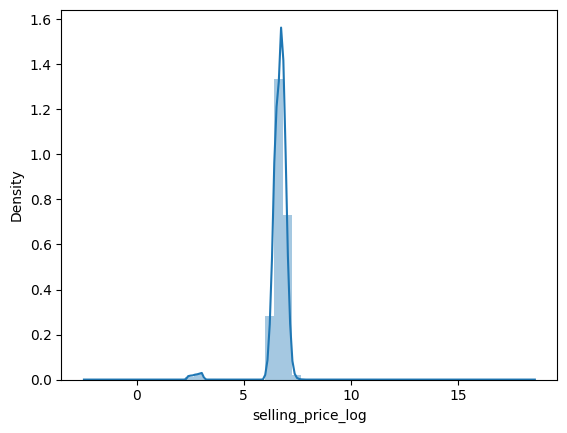

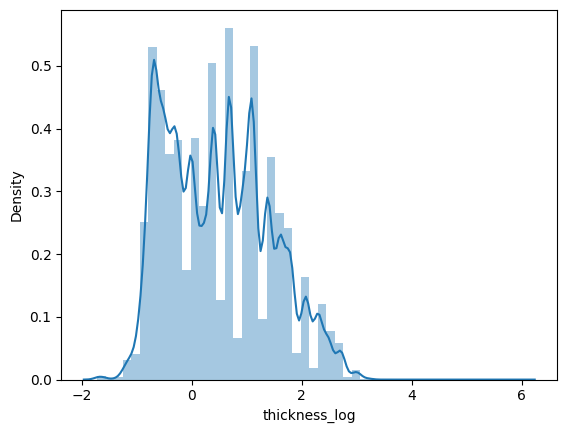

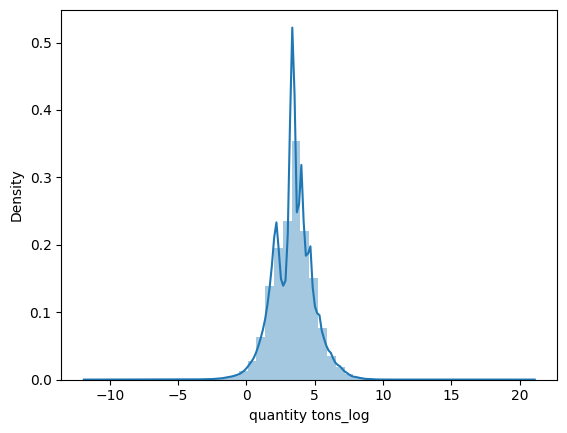

In [17]:
#applying log transformation
dfr["selling_price_log"]=np.log(dfr["selling_price"])
sns.distplot(dfr["selling_price_log"])
plt.show()

dfr["thickness_log"]=np.log(dfr["thickness"])
sns.distplot(dfr["thickness_log"])
plt.show()

dfr["quantity tons_log"]=np.log(dfr["quantity tons"])
sns.distplot(dfr["quantity tons_log"])
plt.show()

In [42]:
#splitting the data into training and testing 
X=dfr[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=dfr["selling_price_log"]


In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV



X=dfr[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=dfr['selling_price_log']
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
it_ohe = ohe.fit_transform(X[['item type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['status']])
s_ohe = ohe2.fit_transform(X[['status']]).toarray()
# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, it_ohe, s_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)
# decision tree
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R-square",r2)
print("mean squared error",mse)



Best hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10}
R-square 0.9051144538418087
mean squared error 0.030748946224370726


In [20]:
#fitting Random forest regressor just to check if our model is working well or not
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(n_estimators=30,random_state=5)                             
RFR.fit(X_train,y_train)
y_pred=RFR.predict(X_test)
print(RFR.score(X_train, y_train))
print(RFR.score(X_test,y_test))



0.9890022360136786
0.9345364423495695


In [21]:
#checking the accuracy score of GBR
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor(n_estimators=30,random_state=5)                             
GBR.fit(X_train,y_train)
y_pred=GBR.predict(X_test)
print(GBR.score(X_train, y_train))
print(GBR.score(X_test,y_test))


0.8736316250678401
0.8852058554658644


In [22]:
#['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be
new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))


Predicted selling price: [586.83472972]


In [23]:
# Saving the regression model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)


In [24]:
dfc= dfr[dfr['status'].isin(['Won', 'Lost'])]
dfc["status"].unique()
len(dfc)


150427

In [26]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer
#splitting the data into training and testing 
X = dfc[['quantity tons_log','selling_price_log','item type','application','thickness_log','width','country','customer','product_ref']]
Y = dfc['status']
#encoding the categorical data to numerical
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
it_ohe = ohe.fit_transform(X[['item type']]).toarray()
lb = LabelBinarizer()
lb.fit(Y) 
y = lb.fit_transform(Y)
# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, it_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=5)


In [27]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")



Accuracy: 0.7867889826940548
Confusion Matrix:
[[ 2726  7580]
 [ 2042 32781]]


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error,classification_report

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
max_depth=classifier.get_depth()
params = {'max_depth': list(range(2, (max_depth +1))), 'min_samples_split': [2, 3, 4],'random_state':[0]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_params_)
# decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")
CR=classification_report(y_test, y_pred)
print(f'Classification Report',CR)


Fitting 3 folds for each of 114 candidates, totalling 342 fits
{'max_depth': 26, 'min_samples_split': 2, 'random_state': 0}
Accuracy: 0.9119413237607746
Confusion Matrix:
[[ 8315  1991]
 [ 1983 32840]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.81      0.81     10306
           1       0.94      0.94      0.94     34823

    accuracy                           0.91     45129
   macro avg       0.88      0.87      0.88     45129
weighted avg       0.91      0.91      0.91     45129



Text(58.222222222222214, 0.5, 'Actual')

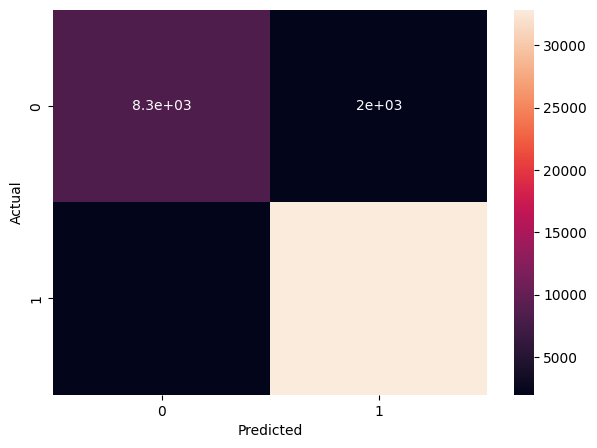

In [31]:
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')


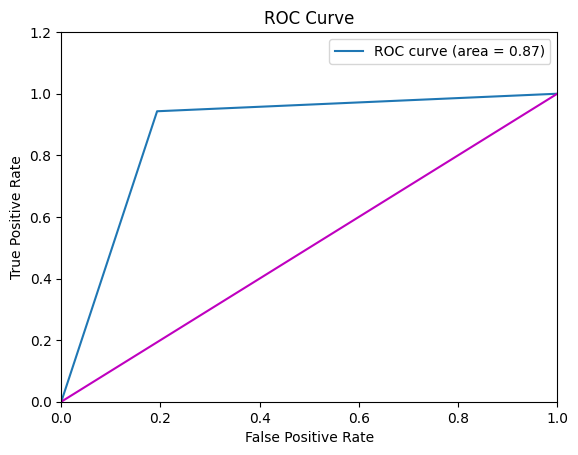

In [33]:
# ROC curve and AUC
from sklearn.metrics import auc,roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'm-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [34]:
#cross validating jus to comfirm whether it is working well or not
from sklearn.model_selection import cross_val_score
print(cross_val_score(dtc,X_train,y_train,cv=5))

[0.90327635 0.89985755 0.90726496 0.90374662 0.90094496]


In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 30, max_depth =18,random_state = 5)
rfc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")



Accuracy: 0.9119413237607746
Confusion Matrix:
[[ 8315  1991]
 [ 1983 32840]]


In [37]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(rfc,X_train,y_train,cv=3))

[0.90421652 0.90908573 0.90868686]


In [38]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=30, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))


1.0
0.9275188902922733


In [39]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(clf,X_train,y_train,cv=3))

[0.9177208  0.91976979 0.91806034]


In [40]:
# Predicting the status for a new sample
# 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
new_sample = np.array([[np.log(700), np.log(956), 10, np.log(2),1500,28.0,30202938,1670798778,'W']])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = dtc.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')


The status is: Won


In [41]:
# Saving the classification model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)